# CNN / Image Classification / Whales vs Dolphins 

#### Author: Daniela Vorkel

This notebook is about image classification using a Convolutional Neural Network. Here, TensorFlow and Keras is used to distinguish between images of dolphins and whales. The images mainly show the backs and back fins of dolphins and whales. The dataset was retrieved from a Kaggle competition: https://www.kaggle.com/competitions/happy-whale-and-dolphin/data

#### Data preparation:

After downloading data from Kaggle, the train images needed to be separated into images of dolphins and whales, because the training data folder still contains mixed images of dolphins and whales. With help of the provided train.csv-file, images were separated and organized into two new folders (dolphins + whales). The data separation was done with another notebook, which also can be found in the GitHub repo. Finally, a main data folder (named 'DATA') was created, keeping the separated data for dolphins and whales as subfolders. Following this structure, the two subfolders will be recognized as two separate classes ('DATA' -> 'dolphin' + 'whales'). The following code is based on such prepared data structure.

## 1. Install Dependencies + Setup

### 1.1 install packages via pip: tensorflow, opencv, matplotlib

#### Working with a Notebooks, there are two ways to install packages:
- install needed packages within dedicated working environment (i.e. Anaconda environment, using Jupyter)
- and/or use !pip-command to directly install packages inside a notebook

In [1]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

#### Retrieve an overview about installed packages using the list-command:

In [2]:
#!pip list

### 1.2 import libraries

The built-up of the CNN is based on TensorFlow, using Keras to organize a sequential model and maintain layers of the neural network. Os is necessary to access and navigate through data path structures. OpenCV provides a library and tools for computer vision, cv2 is needed to read images from a directory. Numpy is essential to work with arrays and feed them as input to the CNN. With Pandas, evaluation metrics can be stored as DataFrame. Matplotlib is used to visualize metrics like accuracy and loss, representing the progress of the CNN.

In [3]:
import tensorflow as tf
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

2023-01-18 18:04:41.860475: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 1.3 GPUs and memory consumption growth

- The training of any CNN can be accelerated by using GPU. 
- TensorFlow provides a package to access the GPU (= tensorflow-gpu). 
- All available GPUs and CPUs can be listed and shown, therefore a proper installation of GPU support can be controlled and confirmed.

#### List all available GPUs:

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

#### Get number of available GPUs:

In [5]:
len(gpus)

0

#### Avoid OOM (out of memory) errors by setting GPU memory consumption growth:

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

#### List all available CPUs:

In [7]:
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

#### Get number of available CPUs:

In [8]:
len(cpus)

1

## 2. Access Data Directory 

- When working with Jupyter Notebook locally, keep main data and notebook within the same folder. 

#### Setup CNN using tf.keras.utils.image_dataset_from_directory( ):

- To classify between two types of images, create a main folder containing two subfolders of classes.
- Each subfolder represents a class and will automatically receive a label 0 or 1 (binary classification).
- In this example, the main folder is named 'DATA', and its subfolders are named 'dolphin' and 'whale'.

### 2.1 Access and confirm the setup of the data directory

#### Return elements of the main data folder:

When accessing the main folder, both created subfolders should be listed. 

In [9]:
os.listdir('DATA')

['dolphin', 'whale']

When using Mac OS, 'DATA/.DS_store' will be listed in the main folder, and cause an error later (because it's not a directory). To remove this element, open a new terminal and delete with following command: 
- find . -name "*.DS_Store" -type f -delete

#### Return apropriate folder structure:

In addition, each subfolder can be accessed by using the os.path.join( )-command. 

In [10]:
os.path.join('DATA', 'dolphin')

'DATA/dolphin'

### 2.2 Define data path

Next, create a variable to store the main data. While having the notebook and main data within the same folder, it is not needed to provide the whole path to it, just use the name of the main data folder: 'DATA'.

In [11]:
data_dir = 'DATA'

### 2.3 Confirm data path

After storing main data into a variable, subfolders and content (images) can be shown:

#### Show subfolders:

In [12]:
os.listdir(data_dir)

['dolphin', 'whale']

#### List images of a subfolder:

In [13]:
os.listdir(os.path.join(data_dir, 'dolphin'))

['f7bad3829e6788.jpg',
 '7de7f9d4344ae1.jpg',
 '26bf47ba8947ca.jpg',
 '3a8bc1bf8c9561.jpg',
 'aa09b560af371f.jpg',
 'd90e6638584532.jpg',
 '359a96ea3915e0.jpg',
 'fc7ee81d77db53.jpg',
 '1bd0f55bf3d9f9.jpg',
 'efeda930b5e16c.jpg',
 '054319eba07fdc.jpg',
 '4375d640cd29df.jpg',
 '93b2c29eae17af.jpg',
 '5316741c31f4c7.jpg',
 'e0284f7155eaec.jpg',
 '1334f1b675fd6f.jpg',
 'a7111639679c13.jpg',
 'ee3ce14d0eba9b.jpg',
 'c849565a837c32.jpg',
 '750561c2aa2c04.jpg',
 '5a7febbb52231a.jpg',
 '0161353eb58f81.jpg',
 '76d243ba62641c.jpg',
 '7104ddf9e57ec1.jpg',
 '1baa7257902c8d.jpg',
 'b292f8b5c714f7.jpg',
 'b6abd0675321c3.jpg',
 '084535e82ed87e.jpg',
 '3fccce25ebd2a5.jpg',
 '4362aaa78a2128.jpg',
 '12e1913cefc765.jpg',
 '0e547b5e339b2a.jpg',
 '7f4f7111158b08.jpg',
 'b31e0abdee438e.jpg',
 '2a9acc28ded396.jpg',
 '7e700cf0aa70e6.jpg',
 '563c96f1ba1a85.jpg',
 '2890aef1f67f5a.jpg',
 'baac2401b2f824.jpg',
 '958776b84c538d.jpg',
 '39866787bf7b68.jpg',
 '09dddc181c29ff.jpg',
 '3a9e7abd21bdbf.jpg',
 '4d589d66b

### 2.4 Read images from directory

Using the cv2.imread( ) method, images will be read and interpreted as array. To test this, copy the name of any image from a subfolder and add its name to the accessing path. 

#### Read image as numpy array:

In [14]:
img = cv2.imread(os.path.join('DATA', 'dolphin', '0a0f53c069bffc.jpg'))
#img

#### Show image type:

In [15]:
type(img)

numpy.ndarray

#### Show image shape (heigth, width, number of channels):

Size and channels of any image can be read out. There will be 3 channels for RGB mode and just 1 channel for grayscale mode.

In [16]:
img.shape

(1743, 2949, 3)

#### Show image (BGR/RGB mode):

By default, any RGB-image will be shown in BGR mode:

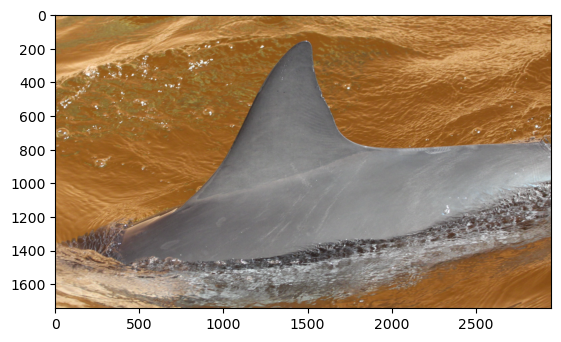

In [17]:
plt.imshow(img)
plt.show()

To show an image in true colors, convert image back to RGB mode:

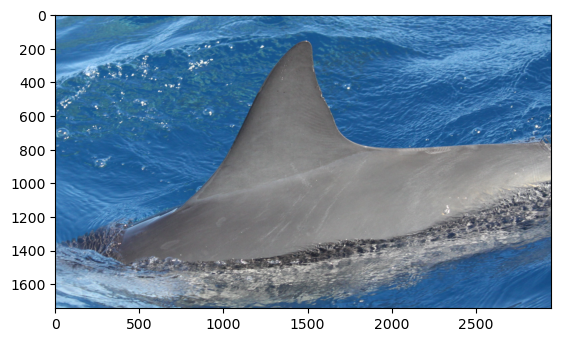

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 3. Load Data

#### Next, load the data to TensorFlow. For more information, access the documentation by adding '??':

In [19]:
tf.data.Dataset??

In [20]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

### 3.1 Build image dataset and data pipeline using 'tf.keras.utils.image_dataset_from_directory' 

- 'tf.keras.utils.image_dataset_from_directory' serves as dataset generator and creates the image dataset
- no need to define classes and labels (subfolders will be recognized as classes)
- some preprocessing included, like re-sizing images

#### Access documentation to get default settings:

In [21]:
tf.keras.utils.image_dataset_from_directory??

By using tf.keras.utils.image_dataset_from_directory('DATA'), dafault settings are loaded to the CNN (as shown in the documentation).

#### Create a customized image dataset:

Since there are small images in the dataset, it is recommended to adjust the image size towards the smallest dimension of available image data. Here, the chosen dimensions for image size is just 50x50. In addition, using a small image size will save RAM space.

In [22]:
data = tf.keras.utils.image_dataset_from_directory('DATA', image_size=(50, 50), color_mode='rgb')

Found 51033 files belonging to 2 classes.


2023-01-18 18:04:49.436166: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 3.2 Access image dataset and its batches

After generating the image dataset, it can't get accessed by commands like 'data[1]' - therefore, use the data iterator instead:

In [23]:
data_iterator = data.as_numpy_iterator()

Get consecutive batches using the .next( )-method:

In [24]:
batch = data_iterator.next()

#### Each batch contains two main information: images + labels:

In [25]:
len(batch)

2

#### Images inside a batch are represented as numpy arrays:

In [26]:
batch[0]

array([[[[192.91249 , 192.91249 , 192.91249 ],
         [212.7525  , 212.7525  , 214.7525  ],
         [195.725   , 196.725   , 198.725   ],
         ...,
         [191.67517 , 195.67517 , 196.67517 ],
         [191.41284 , 195.41284 , 194.41284 ],
         [198.46985 , 202.46985 , 203.46985 ]],

        [[211.60251 , 211.60251 , 211.60251 ],
         [209.425   , 209.425   , 211.425   ],
         [210.34998 , 210.34998 , 211.84998 ],
         ...,
         [202.58746 , 202.58746 , 204.58746 ],
         [196.28027 , 200.28027 , 201.28027 ],
         [199.6936  , 203.6936  , 204.6936  ]],

        [[208.10251 , 212.10251 , 211.10251 ],
         [191.4975  , 195.4975  , 196.4975  ],
         [206.06258 , 206.06258 , 208.06258 ],
         ...,
         [186.51263 , 190.51263 , 189.51263 ],
         [190.28394 , 195.28394 , 191.28394 ],
         [196.03076 , 200.03076 , 201.03076 ]],

        ...,

        [[186.025   , 188.025   , 187.025   ],
         [163.6625  , 163.6625  , 163.6625  ]

#### Show assigned labels inside a batch:

In [27]:
batch[1]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

#### Show batch size, re-sized image dimension and channels:

In [28]:
batch[0].shape

(32, 50, 50, 3)

### 3.3 Visualize images and its labels from a batch 

Images from a batch can be shown together with its label, which is a good way to check input data for proper label assignment. 

#### Show images + labels of the first batch:

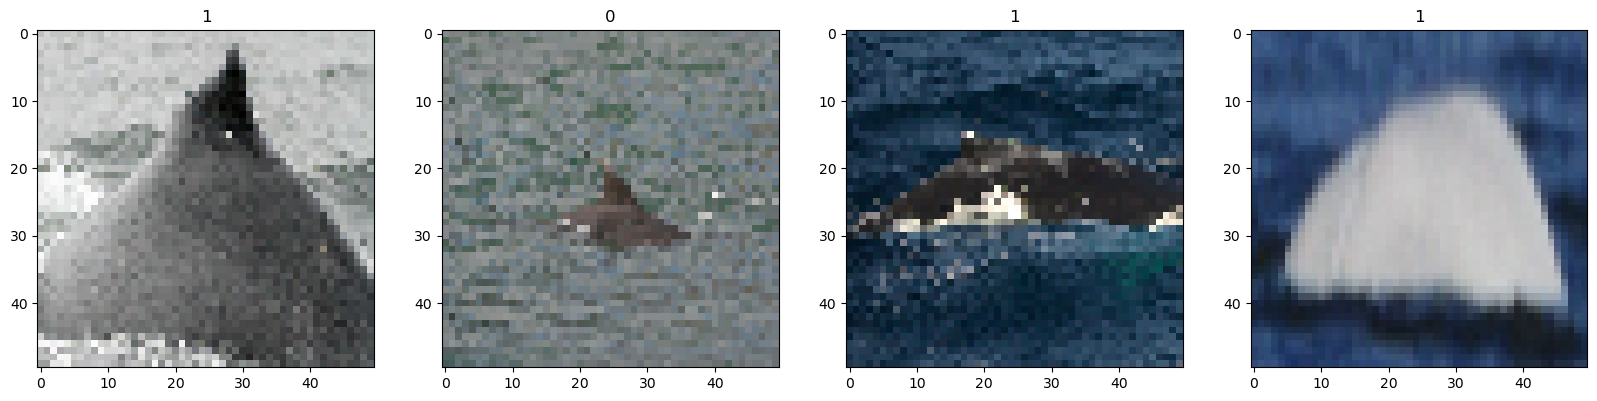

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### To show images + labels of the next batch, use the data iterator:

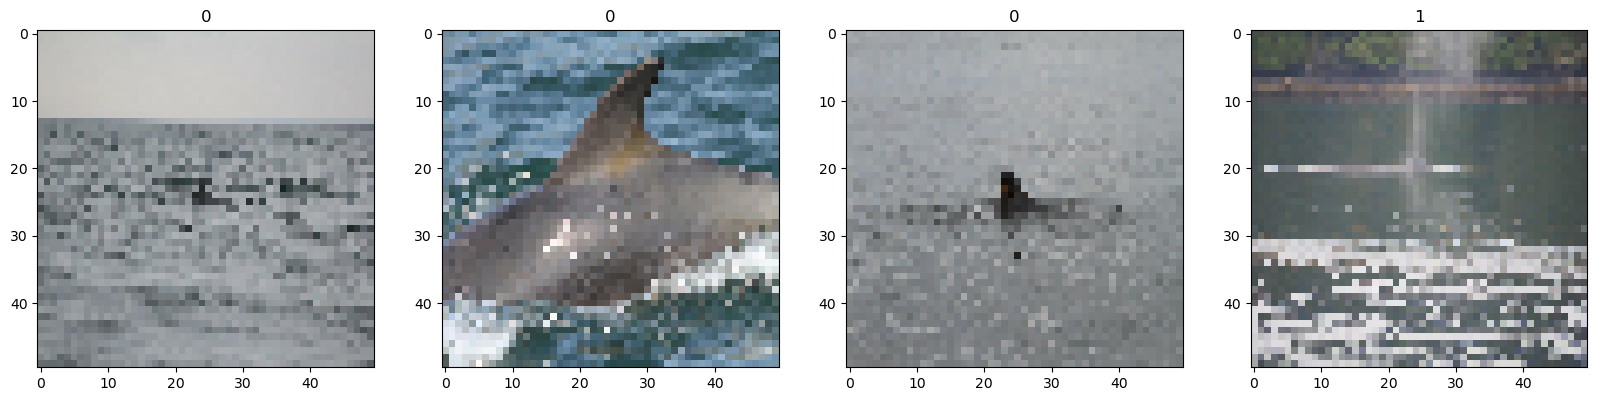

In [30]:
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### Looking at the images, the assignment of the labels follows the folder structure in alphabetic order:
- class 0 = dolphins
- class 1 = whales

## 4. Preprocess data

### 4.1 Scale data

Again, each image in the batch consists of 3 color channels:

In [31]:
batch[0].shape

(32, 50, 50, 3)

Get Minimum and Maximum values of images within a batch:

In [32]:
batch[0].min()

0.539978

In [33]:
batch[0].max()

255.0

#### By scaling, values are kept small (between 0 and 1) and speed up calculations within the neural network:

In [34]:
scaled = batch[0]/255
scaled

array([[[[0.7294118 , 0.73333335, 0.7137255 ],
         [0.7343137 , 0.7382353 , 0.71862745],
         [0.7382353 , 0.74215686, 0.722549  ],
         ...,
         [0.7362745 , 0.7441176 , 0.74019605],
         [0.722549  , 0.7382353 , 0.7343137 ],
         [0.7362745 , 0.7362745 , 0.7362745 ]],

        [[0.72843134, 0.7323529 , 0.7127451 ],
         [0.7411765 , 0.74509805, 0.7254902 ],
         [0.74019605, 0.7441176 , 0.7245098 ],
         ...,
         [0.7392157 , 0.7392157 , 0.7392157 ],
         [0.7392157 , 0.7392157 , 0.7392157 ],
         [0.73333335, 0.73333335, 0.73333335]],

        [[0.7441176 , 0.74019605, 0.7245098 ],
         [0.74215686, 0.7382353 , 0.722549  ],
         [0.7529412 , 0.7490196 , 0.73333335],
         ...,
         [0.7294118 , 0.73333335, 0.7411765 ],
         [0.7205882 , 0.72745097, 0.7343137 ],
         [0.72745097, 0.72745097, 0.72745097]],

        ...,

        [[0.5598039 , 0.5833333 , 0.5833333 ],
         [0.53039217, 0.55      , 0.5656863 ]

After scaling, Minimum and Maximum values change accordingly to numbers between 0 and 1:

In [35]:
scaled.min()

0.002117561

In [36]:
scaled.max()

1.0

#### Apply the scaling to all data in the pipeline, using .map( ) and Lambda function:
- data.map( ) allows transformation within pipeline, maps across elements of dataset
- x represents images, which will be transformed
- y represents labels, and won't be transformed

In [37]:
data = data.map(lambda x,y: (x/255, y))

#### After scaling, shuffle through data and show new values for Minimum and Maximum:

In [38]:
scaled_iterator_min = data.as_numpy_iterator().next()[0].min()
scaled_iterator_min

0.0

In [39]:
scaled_iterator_max = data.as_numpy_iterator().next()[0].max()
scaled_iterator_max

1.0

#### To show scaled images, remove .astype(int) - otherwise, it will return black images:

In [40]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
#batch

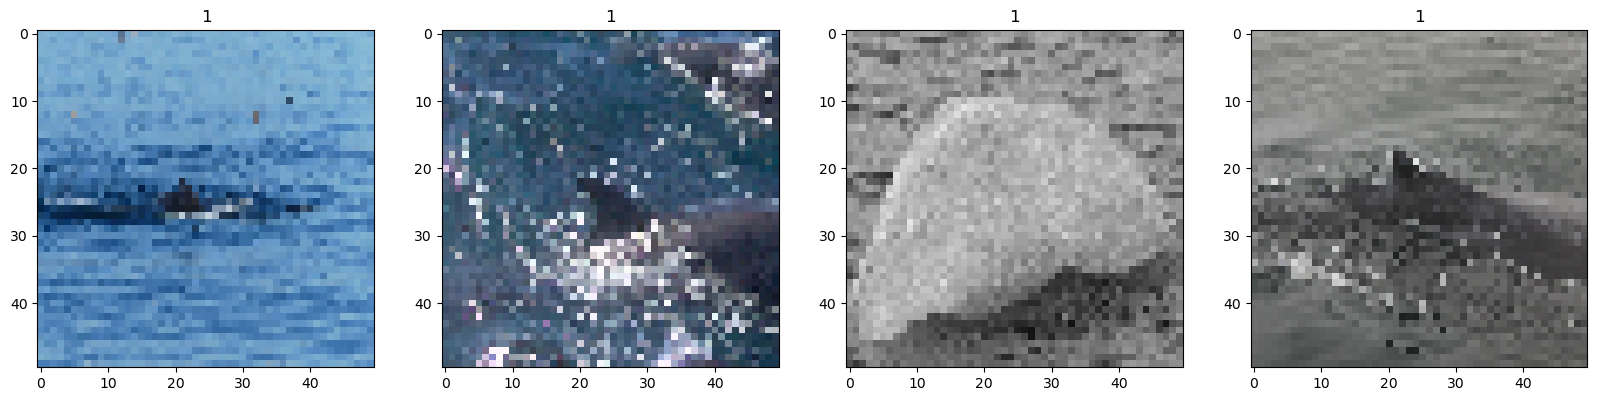

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    # keep only .imshow(img)
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 4.2 Split data

Next, the dataset needs to be split into 3 parts: one for training, one for validation, and one for testing. 

#### Get the number of batches to split:

While creating the dataset (using tf.keras.utils.image_dataset_from_directory( )), the default batch size was kept, and therefore set to 32. The total amount of created batches can be shown with len(data).

In [42]:
len(data)

1595

#### Define data for training, validation and testing:

In [43]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

#### The sum of all split parts should be equal to the total number of batches:

In [44]:
train_size + val_size + test_size

1594

#### If the total number of batches is not even, a part of the data will be truncated:
- check the total size of each set 
- add (+1) to a validation and/or training set to equal the distribution

In [45]:
train_size, val_size, test_size

(1116, 319, 159)

In [46]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

#### After adjustment, confirm the new size of the validation and/or testing set:

In [47]:
train_size, val_size, test_size

(1116, 319, 160)

#### Finally, the sum of training, validation and testing size should equal the len(data):

In [48]:
train_size + val_size + test_size

1595

### 4.3 Allocate training, validation, and testing data

Use .take( ) and .skip( ) to establish and allocate training, validation and testing partition in the pipeline:

In [49]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## 5. Deep CNN Model

### 5.1 Build the Deep Learning Model

- import sequential API: arranging the Keras layers in sequential order
- import Conv2D: spatial convolution over images
- import MaxPooling2D: condensing layer, takes Maximum of values
- import Dense: fully/deeply connected neural network layer 
- import Flatten: flattens the multi-dimensional input tensors into a single dimension

#### Import sequential model and layers:

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#### Define the sequential model:

In [51]:
model = Sequential()

#### Define single layers by the .add( )-method:

In [52]:
# first layer needs to have a defined input_shape, 16 filters with size = 3x3, stride=1,
# activation = 'relu' to preserve positive values only
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(50,50,3)))
# takes maximum value after 'relu'-activation
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
# condense and flatten to single dimension 
model.add(Flatten())

# fully connected layer, takes flattened values as input
model.add(Dense(50, activation='relu'))
# single output: a value between 0 and 1 for classification -> dolphin or whale
model.add(Dense(1, activation='sigmoid'))

### 5.2 Compile the Deep Learning Model

- the optimizer will be 'Adam'
- the loss function will be 'Binary Crossentropy'

In [53]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Find more optimizers and loss functions by accessing the documentation:

In [54]:
tf.optimizers??

In [55]:
tf.losses??

### 5.3 Get the summary of the model settings

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0

### 5.4 Logging

While the model is trained, all taken steps of training and validation can be traced and stored (= callbacks). 

#### Create a logging folder called 'logs':

In [57]:
os.mkdir('logs')

#### Define logging folder and callbacks to send there:

In [58]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

### 5.5 Train the Model

#### Fit the model on the training data and include the callbacks for logging:

In [60]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1116/1116 [==============================] - 625s 559ms/step - loss: 0.4602 - accuracy: 0.7716 - val_loss: 0.3814 - val_accuracy: 0.8194
Epoch 2/20
1116/1116 [==============================] - 731s 653ms/step - loss: 0.3582 - accuracy: 0.8347 - val_loss: 0.3330 - val_accuracy: 0.8528
Epoch 3/20
1116/1116 [==============================] - 753s 672ms/step - loss: 0.3169 - accuracy: 0.8578 - val_loss: 0.3261 - val_accuracy: 0.8567
Epoch 4/20
1116/1116 [==============================] - 771s 689ms/step - loss: 0.2885 - accuracy: 0.8732 - val_loss: 0.2893 - val_accuracy: 0.8766
Epoch 5/20
1116/1116 [==============================] - 2671s 2s/step - loss: 0.2588 - accuracy: 0.8875 - val_loss: 0.2583 - val_accuracy: 0.8921
Epoch 6/20
1116/1116 [==============================] - 755s 675ms/step - loss: 0.2387 - accuracy: 0.8986 - val_loss: 0.2424 - val_accuracy: 0.8949
Epoch 7/20
1116/1116 [==============================] - 748s 668ms/step - loss: 0.2212 - accuracy: 0.9066 - val_lo

## 6. Model performance and evaluation

It may take several approaches to train and adjust a model with desired accuracy. To compare the performance of different models, it is helpful to collect its metrics.

### 6.1 Collect and save traced values (metrics) of the training

In [61]:
history.history

{'loss': [0.46024319529533386,
  0.35819822549819946,
  0.31694746017456055,
  0.2885288894176483,
  0.25883835554122925,
  0.23867997527122498,
  0.22123460471630096,
  0.20944088697433472,
  0.19820953905582428,
  0.1892901062965393,
  0.18045876920223236,
  0.1695290058851242,
  0.16427315771579742,
  0.1556820571422577,
  0.14927351474761963,
  0.14176581799983978,
  0.13420283794403076,
  0.1298588067293167,
  0.12370940297842026,
  0.11724496632814407],
 'accuracy': [0.7715613842010498,
  0.8347054123878479,
  0.8577789068222046,
  0.8732358813285828,
  0.8874607682228088,
  0.8986335396766663,
  0.9066420197486877,
  0.9108422994613647,
  0.9170587062835693,
  0.9212029576301575,
  0.9254032373428345,
  0.9296035170555115,
  0.9327957034111023,
  0.9357919096946716,
  0.9387320876121521,
  0.9423162937164307,
  0.9464605450630188,
  0.9481967091560364,
  0.9510248899459839,
  0.9533770084381104],
 'val_loss': [0.3814155161380768,
  0.3329926133155823,
  0.32613325119018555,
  0.

#### Convert traced values (metrics) into a DataFrame:

In [62]:
import pandas as pd
metrics_df = pd.DataFrame(history.history)
metrics_df

,loss,accuracy,val_loss,val_accuracy
0,0.460243,0.771561,0.381416,0.819357
1,0.358198,0.834705,0.332993,0.852763
2,0.316947,0.857779,0.326133,0.856681
3,0.288529,0.873236,0.289322,0.876567
4,0.258838,0.887461,0.258345,0.892143
5,0.238680,0.898634,0.242427,0.894886
6,0.221235,0.906642,0.262283,0.890282
7,0.209441,0.910842,0.231552,0.901548
8,0.198210,0.917059,0.246966,0.897139
9,0.189290,0.921203,0.252513,0.893221


#### Save DataFrame as CSV-file:

In [63]:
metrics_df.to_csv("metrics_50x50x3_resorted_30epochs.csv")

### 6.2 Plot metrics to visualize the performance of the model

#### For a simple plotting, forward the DataFrame to the .plot( )-function:

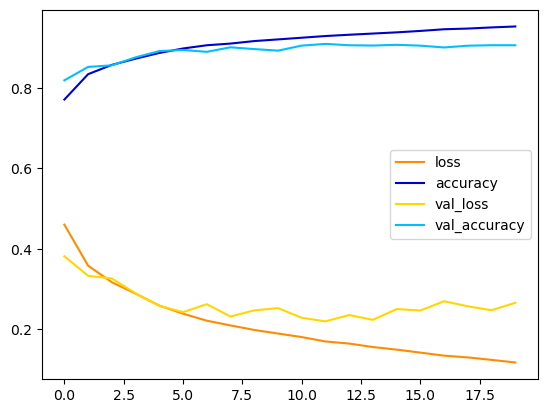

In [64]:
metrics_df.plot(color=['darkorange', 'mediumblue', 'gold', 'deepskyblue']);

#### For customized plotting, add details for axis, title, etc.: 

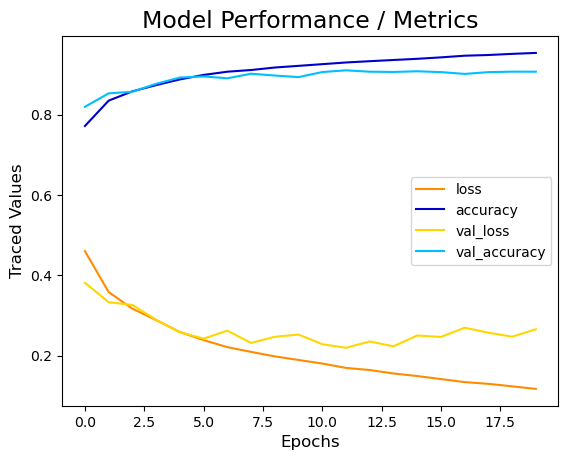

In [65]:
metrics_df.plot(color=['darkorange', 'mediumblue', 'gold', 'deepskyblue'])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Traced Values', fontsize= 12)
plt.title('Model Performance / Metrics', fontsize=17);

#### Plot training accuracy and loss:

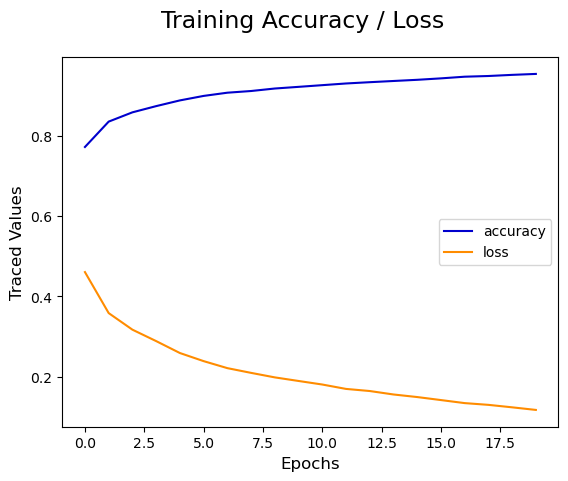

In [66]:
fig  = plt.figure()
plt.plot(history.history['accuracy'], color='mediumblue', label='accuracy')
plt.plot(history.history['loss'], color='darkorange', label='loss')
fig.suptitle('Training Accuracy / Loss', fontsize=17)
plt.legend(loc='center right')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Traced Values', fontsize= 12)
plt.show()

#### Plot training and validation loss:

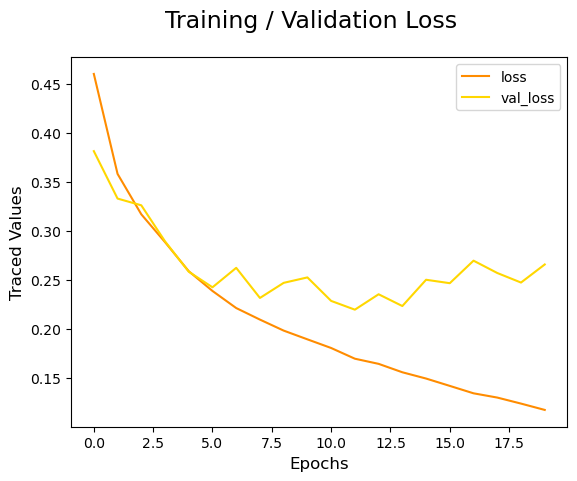

In [67]:
fig  = plt.figure()
plt.plot(history.history['loss'], color='darkorange', label='loss')
plt.plot(history.history['val_loss'], color='gold', label='val_loss')
fig.suptitle('Training / Validation Loss', fontsize=17)
plt.legend(loc='upper right')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Traced Values', fontsize= 12)
plt.show()

#### Plot training and validation accuracy:

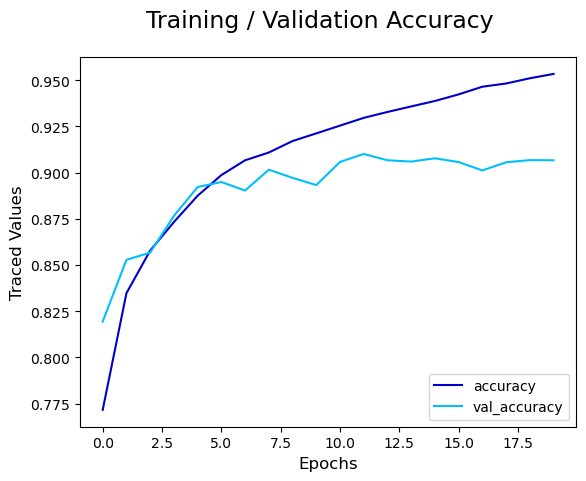

In [68]:
fig  = plt.figure()
plt.plot(history.history['accuracy'], color='mediumblue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='deepskyblue', label='val_accuracy')
fig.suptitle('Training / Validation Accuracy', fontsize=17)
plt.legend(loc='lower right')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Traced Values', fontsize= 12)
plt.show()

### 6.2 Evaluate performance

#### Import Precision, Recall and BinaryAccuracy as metrics from TensorFlow:

In [69]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

#### Assign a variable for each metric:

In [70]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

#### Predict on the testing set and collect values for Precision, Recall and BinaryAccuracy:

In [71]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 96ms/step


#### Retrieve the final values for Precision, Recall and BinaryAccuracy:

In [72]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.907496452331543, Recall:0.9432519674301147, Accuracy:0.898298442363739


50x50x3_20_epochs_best_values:
- Precision:0.92848801612854, 
- Recall:0.9255164265632629, 
- Accuracy:0.9020144939422607

## 7. Test and apply the model on unknown images

So far, the content of the labeled training data folder was used to train, validate and test the neural network. To actually predict on unknown data, retrieve an image from the testing data folder. To apply the model for prediction, any input imagee needs to be adapted to the shape of the Tensor the model was trained on.

#### Read any image of the testing data folder, and convert to RGB mode:

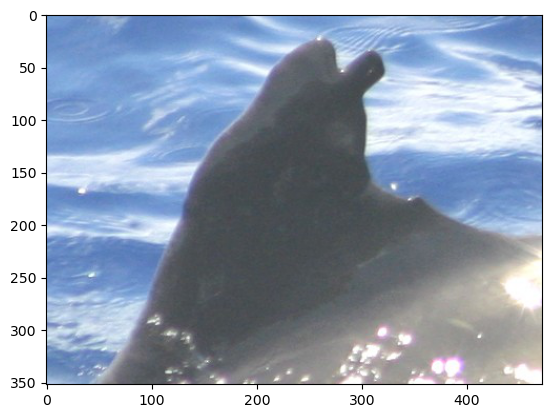

In [74]:
img = cv2.imread('c69a8883d8b43f.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#### Resize the image towards the dimensions used for the training:

<function matplotlib.pyplot.show(close=None, block=None)>

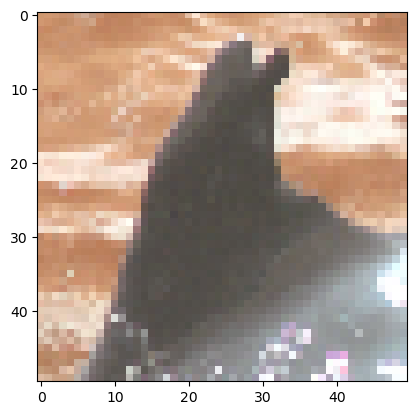

In [75]:
resize = tf.image.resize(img, (50, 50))
plt.imshow(resize.numpy().astype(int))
plt.show

#### Get the shape of the Tensor (input size = 50x50, 3 channels for RGB):

In [76]:
resize.shape

TensorShape([50, 50, 3])

In [77]:
np.expand_dims(resize, 0).shape

(1, 50, 50, 3)

#### Scale the image and use the model to predict the class:

In [78]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 96ms/step


#### Get the result of the prediction (a value between 0 and 1):

In [79]:
yhat

array([[0.99657595]], dtype=float32)

#### Retrieve the predicted class:

In [80]:
if yhat < 0.5:
    print(f'Predicted class: Dolphin')
else:
    print(f'Predicted class: Whale')

Predicted class: Whale


### 8. Save the model

In [83]:
model.save(os.path.join('models', 'whale_dolphin_classifier_50x50x3_20epochs.h5'))